In [1]:
import torch 
from torch import nn
import torchvision
from torchvision import transforms, datasets
from torchvision.transforms import ToTensor

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [7]:
# class SARDespeckleModel(nn.Module):
#     def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
#         super().__init__()
#         self.layer_1 = nn.Sequential(
#             nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
#             nn.ReLU()
#         )
#         for i in range(5):
            


In [3]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, Compose

class ImageDataset(Dataset):
    def __init__(self, image_dir, image_dir_2, transform=None):
        self.image_dir = image_dir
        self.image_dir_2 = image_dir_2
        self.image_files = [i for i in os.listdir(image_dir) if i.endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
        self.images_files_2 = [i for i in os.listdir(image_dir_2) if i.endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
        self.transform = transform
 
    def len(self):
        return len(self.image_files)

    def getItem(self, dirc, files, idx):
        img_path = os.path.join(dirc, files[idx])
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image  
    
    def getDataset(self, limit):
        total_dataset = []
        for i in range(limit):
            if i % 1000 == 0:
                print(f"Have reached {i}/{len(self.image_files)}")
            total_dataset.append([self.getItem(dirc =self.image_dir, files=self.image_files, idx=i), self.getItem(dirc =self.image_dir_2, files=self.images_files_2, idx=i)])
        return total_dataset

In [4]:
from dotenv import load_dotenv
import os

load_dotenv()
clean_dir = os.environ["DATA_DIR"]
noise_dir = os.environ['DATA_DIR_2']

In [5]:
transformations = Compose([
    ToTensor(), 
])

train_dataset = ImageDataset(image_dir=clean_dir, image_dir_2=noise_dir, transform=transformations).getDataset(7000)
test_dataset = ImageDataset(image_dir=clean_dir, image_dir_2=noise_dir, transform=transformations).getDataset(2000)

Have reached 0/31500
Have reached 1000/31500
Have reached 2000/31500
Have reached 3000/31500
Have reached 4000/31500
Have reached 5000/31500
Have reached 6000/31500
Have reached 0/31500
Have reached 1000/31500


In [8]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)


In [12]:
train_image_batches, train_target_batches = next(iter(train_dataloader))
test_image = train_image_batches[0]
test_image

tensor([[[0.5647, 0.6157, 0.5882,  ..., 0.4275, 0.5020, 0.5647],
         [0.5608, 0.6353, 0.6471,  ..., 0.3647, 0.4392, 0.5059],
         [0.4667, 0.5686, 0.6863,  ..., 0.4118, 0.4784, 0.5333],
         ...,
         [0.2000, 0.1804, 0.1490,  ..., 0.2980, 0.3020, 0.3059],
         [0.1451, 0.1647, 0.1608,  ..., 0.3255, 0.2941, 0.2471],
         [0.0941, 0.1529, 0.1843,  ..., 0.3686, 0.3765, 0.3255]],

        [[0.5647, 0.6157, 0.5882,  ..., 0.4275, 0.5020, 0.5647],
         [0.5608, 0.6353, 0.6471,  ..., 0.3647, 0.4392, 0.5059],
         [0.4667, 0.5686, 0.6863,  ..., 0.4118, 0.4784, 0.5333],
         ...,
         [0.2000, 0.1804, 0.1490,  ..., 0.2980, 0.3020, 0.3059],
         [0.1451, 0.1647, 0.1608,  ..., 0.3255, 0.2941, 0.2471],
         [0.0941, 0.1529, 0.1843,  ..., 0.3686, 0.3765, 0.3255]],

        [[0.5647, 0.6157, 0.5882,  ..., 0.4275, 0.5020, 0.5647],
         [0.5608, 0.6353, 0.6471,  ..., 0.3647, 0.4392, 0.5059],
         [0.4667, 0.5686, 0.6863,  ..., 0.4118, 0.4784, 0.

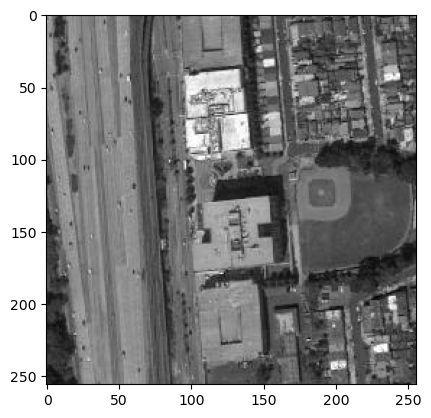

In [34]:
import matplotlib.pyplot as plt

plt.imshow(test_image[0], cmap='gray')
plt.show()


torch.Size([3, 256, 256])